# Undulator tapering

In [1]:
'''
best results for K:  (array([-0.00038487]), array([[ 20.78804564]]))
'''


%load_ext autoreload
%autoreload 2
%matplotlib inline
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

from modules.bayes_optimization import BayesOpt, negUCB, negExpImprove
# from modules.bayes_optimization_lik_opt import BayesOpt, negUCB, negExpImprove

from modules.OnlineGP import OGP
import numpy as np
import importlib


mi_module = importlib.import_module('machine_interfaces.undulator_interface')
import time
import matplotlib.pyplot as plt
from IPython.display import clear_output

saveResultsQ = True

#how long to wait between acquisitions
acquisition_delay = 0 

#create the machine interface
dev_ids = ['und_k']
start_point = 1    
mi = mi_module.machine_interface(dev_ids = dev_ids, start_point = start_point)

In [59]:
opt.best_seen()

(array([-0.00038487]), array([[ 20.78804564]]))

In [60]:
k=np.linspace(-1,1,20)
x_list = []
y_list = []
y = []
for i in k:
    #pass in param_K
    mi.setX(-0.00038487-i/100000)
    s=mi.getState()
    print(s)
    yi = s[1][0][0]
    y.append(yi) # y = [mi.getState()[1][0] for x in range(10)]
    x_list.append(s[0])
    y_list.append(s[1])
np.std(y)

(array([[-0.00037487]]), array([[ 20.63189175]]))
(array([[-0.00037592]]), array([[ 20.68277009]]))
(array([[-0.00037698]]), array([[ 20.65781173]]))
(array([[-0.00037803]]), array([[ 20.6368296]]))
(array([[-0.00037908]]), array([[ 20.62084819]]))
(array([[-0.00038013]]), array([[ 20.68674869]]))
(array([[-0.00038119]]), array([[ 20.72973516]]))
(array([[-0.00038224]]), array([[ 20.79069785]]))
(array([[-0.00038329]]), array([[ 20.78775135]]))
(array([[-0.00038434]]), array([[ 20.80249157]]))
(array([[-0.0003854]]), array([[ 20.8118562]]))
(array([[-0.00038645]]), array([[ 20.81429269]]))
(array([[-0.0003875]]), array([[ 20.85966127]]))
(array([[-0.00038855]]), array([[ 20.85818273]]))
(array([[-0.00038961]]), array([[ 20.82051178]]))
(array([[-0.00039066]]), array([[ 20.77240479]]))
(array([[-0.00039171]]), array([[ 20.72103381]]))
(array([[-0.00039276]]), array([[ 20.75583665]]))
(array([[-0.00039382]]), array([[ 20.76851434]]))
(array([[-0.00039487]]), array([[ 20.72411638]]))


0.0726411537572033

In [ ]:
# y=[]
# for i in range(10):
#     yi = mi.getState()[1][0]
#     print(yi)
#     y.append(yi) # y = [mi.getState()[1][0] for x in range(10)]
# np.std(y)

In [ ]:
# k=np.linspace(3,4,5)
# y=[]
# for i in k:
#     #pass in param_K
#     mi.setX(-i/1000)
#     s=mi.getState()
#     print(s)
#     yi = s[1][0][0]
#     y.append(yi) # y = [mi.getState()[1][0] for x in range(10)]
# np.std(y)

In [ ]:
#%matplotlib inline
#plt.plot(-k/1000,y,'.')

**Create the gp**

In [2]:
#build gp surrogte model
ndim = len(dev_ids)
#1. gp_lengthscales - learning rate
#gp_lengthscales = np.array([1])
#gp_lengthscales = np.array([0.0001])

gp_lengthscales = np.array([0.001])

#gp_precisionmat = 1/np.diag(gp_lengthscales**(2))

#gp_precisionmat = np.diag(np.log(1./gp_lengthscales**(2)))
gp_precisionmat = np.log(1./gp_lengthscales**(2))

#2. gp_amp
#gp_amp = 0.1
gp_amp = 1
#3. gp_noise
#gp_noise = 0.0001 
gp_noise =  10**(-4)

hyps = [gp_precisionmat, np.log(gp_amp), np.log(gp_noise**2)] #format the hyperparams for the OGP
gp = OGP(ndim, hyps)



In [10]:
print(gp.precisionMatrix)

None


In [ ]:
gp.update(x_list[0],y_list[0])
gp.update(x_list[2],y_list[2])


In [ ]:
a=[np.array([[ 32.2361913]]), 0.0]

In [ ]:
gp.computeCov(x_list[0],x_list[1])


In [ ]:
gp.KB[0]

In [ ]:
for x,y in zip(x_list[::], y_list[::]):
    print(x,y)
    gp.update(x,y)
    
#for i in range(5):
#    gp.update(x_list[0], y_list[0])

In [ ]:
for x,y in zip(x_list[::], y_list[::]):
    print(x,y,gp.predict(np.array(x, ndmin=2)))

In [ ]:
x_obs_uniq = []
y_obs_uniq = []
for i,(x,y) in enumerate(zip(opt.X_obs,opt.Y_obs)):
    if x in x_obs_uniq:
        continue
    else:
        x_obs_uniq.append(x)
        y_obs_uniq.append(y)


In [ ]:
for x,y in zip(x_obs_uniq, y_obs_uniq):
    print(x,y)
    gp.update(np.array(x, ndmin=2),y)
    

In [ ]:
t=[]
for x,y in zip(x_obs_uniq, y_obs_uniq):
    print(x,y,gp.predict(np.array(x, ndmin=2)))
    t.append(gp.predict(np.array(x, ndmin=2))[0][0])

In [ ]:
fig, ax = plt.subplots()
#ax.set_xscale("log")
ax.set_yscale("log")
plt.scatter(x_obs_uniq,t)
plt.scatter(x_obs_uniq,y_obs_uniq)
ax.set_xlim(min(x_obs_uniq), max(x_obs_uniq))

In [3]:
#create the bayesian optimizer that will use the gp as the model to optimize the machine 
#opt = BayesOpt(gp, mi, acq_func="UCB", start_dev_vals = mi.x, dev_ids = dev_ids)
#mi.setX(-0.004)
#opt = BayesOpt(gp, mi, acq_func="UCB", start_dev_vals = -0.004, dev_ids = dev_ids, bounds=((-np.inf, 0)))


mi.setX(-0.001)
s=mi.getState()
opt = BayesOpt(gp, mi, acq_func="UCB", dev_ids = dev_ids, bounds=((-0.00875,0),))

opt.ucb_params = [2,None]
print('ucb_params',opt.ucb_params)

('target_func = ', <machine_interfaces.undulator_interface.machine_interface instance at 0x0000000009689308>)
********* BO - self.mi = self.target_func WORKED!
Supposed to be grabbing machine state...
('x_init', array([[-0.001]]))
('y_init', array([[ 1.98301731]]))
ucb_params [2, None]


In [5]:
opt.lengthscales[0]=1

In [ ]:
opt.OptIter()

In [106]:
#opt.model.predict(np.array(-0.00093098, ndmin=2))
opt.best_seen()

(array([-0.00038487]), array([[ 20.78804564]]))

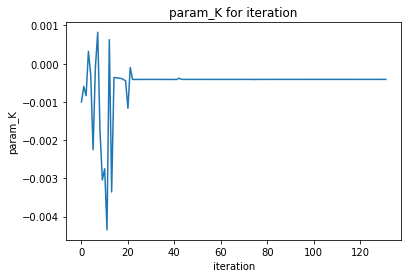

In [53]:
plt.plot(opt.X_obs)
plot.plot()
plt.xlabel('iteration')
plt.ylabel('param_K')
plt.title('param_K for iteration')

In [70]:
t = np.array(Obj_state_s)
np.where(t==t.max())

(array([18], dtype=int64), array([0], dtype=int64))

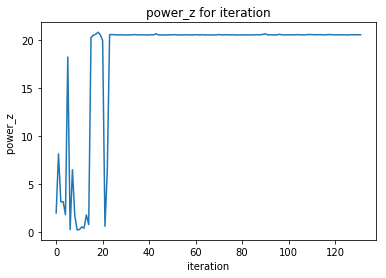

In [97]:
plt.plot(Obj_state_s[:-1],'-')
plt.xlabel('iteration')
plt.ylabel('power_z ')
plt.title('power_z for iteration')
#plt.plot(18,np.array(Obj_state_s).max(),'o')


In [86]:
from machine_interfaces.taper_output import taper_output
z,power_z = taper_output(-0.00038487)
#plt.plot(t)

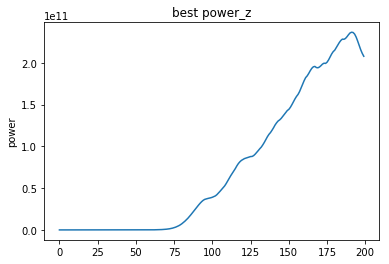

In [89]:
plt.plot(power_z)
plt.ylabel('power')
plt.title('best power_z')

In [58]:
opt.best_seen()

(array([-0.00038487]), array([[ 20.78804564]]))

**Running BO**

*run the gp search for some number of steps*

In [7]:
Obj_state_s=[]

In [10]:
opt.lengthscales[0]=1e-6

In [11]:
import time
end = time.time()
Niter = 10
for i in range(Niter):
#    clear_output(wait=True) 
    print ('iteration =', i)
    print ('current position:', mi.x, 'current objective value:', mi.getState()[1])
    
    x_best, y_best = opt.best_seen()
    print('best position:', x_best, 'best objective value:', y_best)
    Obj_state_s.append(mi.getState()[1][0])
    print('time=', time.time()-end)
    end = time.time()

    #plotting
#    f = plt.figure(figsize=(20,3))
#    ax = f.add_subplot(121)
#    ax2 = f.add_subplot(122)
#    ax.set_ylabel('K',fontsize=12)
#    ax.plot(opt.X_obs,'.-')
#    ax2.set_ylabel('Obj_state_s',fontsize=12)
#    ax2.plot(Obj_state_s,'.-')
#    plt.show(); 
    
    #optimization
    opt.OptIter()

iteration = 0
current position: [[-0.0048054]] current objective value: [[ 0.31707588]]
best position: [-0.00039288] best objective value: [[ 20.74847793]]
time= 12.2869999409
use minimize add by huang
('spase gamma,k', array([[  2.01187066e-08]]), array([[ 1.00000001]]))
iteration = 1
current position: [[-0.00039196]] current objective value: [[ 20.72017732]]
best position: [-0.00039288] best objective value: [[ 20.74847793]]
time= 24.2309999466
use minimize add by huang
('spase gamma,k', array([[  2.02522340e-08]]), array([[ 1.00000001]]))
iteration = 2
current position: [[-0.00039104]] current objective value: [[ 20.74995253]]
best position: [-0.00039104] best objective value: [[ 20.74995253]]
time= 24.2969999313
use minimize add by huang
('spase gamma,k', array([[  2.03980690e-08]]), array([[ 1.00000001]]))
iteration = 3
current position: [[-0.00039012]] current objective value: [[ 20.78510941]]
best position: [-0.00039012] best objective value: [[ 20.78510941]]
time= 25.8540000916

KeyboardInterrupt: 

In [101]:
opt.lengthscales

array([  1.00000000e-05])

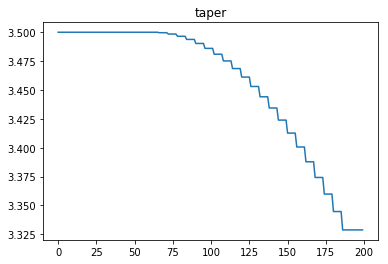

In [12]:
def convert_long(l,N=200):
    #result=[3.5]*66
    result=[]
    step = N//len(l)
    for i in range(len(l)-1):
        result = result + [l[i]]*step
    result = result + [l[-1]]*(N-step*(len(l)-1))
    return result

def taper_get(param_K):
    '''
    Input:
    unduK is an array to represent taper profile (recommend to be a shape of (200,)
    
    Output:
    z is the position array along the undulator
    power_z is the output power along undulator
    '''
    
    starting_step_short = 11
    z_steps_short = 32
    const_K = 3.5
    n_z = 2
    unduK_1=const_K*np.ones(int(starting_step_short))
    
    '''modified by huang'''
    unduK_2=const_K+param_K*np.arange(1,1+z_steps_short-starting_step_short)**n_z
    
    #unduK_2=const_K+param_K*np.arange(z_steps_short-starting_step_short)**n_z
    undu_K=np.concatenate((unduK_1,unduK_2))
    unduK = np.array(convert_long(undu_K))
    return unduK
plt.plot(taper_get(opt.best_seen()[0]))
plt.title('taper')

In [14]:
a=taper_get(opt.best_seen()[0])

In [18]:
a[:65][a==3.5]

IndexError: boolean index did not match indexed array along dimension 0; dimension is 65 but corresponding boolean dimension is 200

In [ ]:
# self=opt
# from modules.parallelstuff import *
# from modules.bayes_optimization import negUCB
# #acq_func = opt.aqfcn
# xi=0.0
# alt_param=-1
# aqfcn = negUCB
# nsteps = 1 + self.X_obs.shape[0] 
# fargs = (opt.model, ndim, nsteps, opt.ucb_params[0], opt.ucb_params[1])
# neval = 2*int(10.*2.**(ndim/12.))
# nkeep = 2*min(8,neval)
# nbest = 3 # add the best points seen so far (largest Y_obs)
# nstart = 2
# aqfcn(np.array(-0.00053092,ndmin=2), opt.model, ndim, nsteps, )


#yobs = np.array([y[0][0] for y in opt.Y_obs])
#isearch = yobs.argsort()[-nbest:]
#for i in range(min(nstart,len(opt.Y_obs))): #
#                    if np.sum(isearch == i) == 0: # not found in list
#                        isearch = np.append(isearch, i)
#                        isearch.sort()
#v0s = None
#
#for i in isearch:
#                    
#                    vs = parallelgridsearch(aqfcn,opt.X_obs[i],opt.searchBoundScaleFactor * 0.6*opt.lengthscales,fargs,neval,nkeep)
#                   
#                    if type(v0s) == type(None):
#                        v0s = copy.copy(vs)
#                    else:
#                        v0s = np.vstack((v0s,vs))
#

In [ ]:
v0sort = v0s[:,-1].argsort()[:nkeep] # keep the nlargest
v0s = v0s[v0sort]

x0s = v0s[:,:-1] # for later testing if the minimize results are better than the best starting point
v0best = v0s[0]

In [ ]:
v0s

In [ ]:
x_in = np.array(x_new,ndmin=2)
model.predict(np.array(x_new,ndmin=2))
self=model
k_x = self.computeCov(x_in, self.BV)

In [ ]:
np.dot(k_x, self.alpha)
self.alpha

In [ ]:
opt.X_obs

In [ ]:
model=opt.model
x_new=-0.00059531
delta = 1.
nu = 1
(y_mean, y_var) = model.predict(np.array(x_new,ndmin=2))
y_mean, y_var
tau = 2.*np.log(nsteps**(0.5*ndim+2.)*(np.pi**2.)/3./delta)
GPUCB = y_mean + np.sqrt(nu * tau * y_var)
print(y_mean, y_var, GPUCB)

In [ ]:
a=((-np.inf,0),)
x = np.array([-0.004,1])
max(x)

In [ ]:
x = np.array([2,1])
x0s=x
bounds=((-np.inf,0),)
np.random.uniform(max(x0s.min(), bounds[0][0]), min(x0s.max(), bounds[0][1]))

In [ ]:
opt.X_obs

# BO with likelihood optimiztion on the fly

In [ ]:
#create the machine interface
dev_ids = scan_params['dev_ids']
start_point =  start_point
mi0 = mi_module.machine_interface(dev_ids = dev_ids, start_point = start_point)


ndim = len(dev_ids)

gp_precisionmat = scan_params['gp_precisionmat']
gp_amp = scan_params['gp_amp'] 
gp_noise = scan_params['gp_noise'] #std

hyps = [gp_precisionmat, np.log(gp_amp), np.log(gp_noise**2)] #format the hyperparams for the OGP
gp0 = OGP(ndim, hyps)

In [ ]:
#create the bayesian optimizer that will use the gp as the model to optimize the machine 
opt0 = BayesOpt(gp0, mi0, acq_func="UCB", start_dev_vals = mi0.x, dev_ids = dev_ids)
opt0.ucb_params = opt.ucb_params
print('ucb_params',opt0.ucb_params)
Obj_state_s0=[]

In [ ]:
for i in range(Niter):
    clear_output(wait=True) 
    print ('iteration =', i)
    print ('current position:', mi0.x, 'current objective value:', mi0.getState()[1])
   
    Obj_state_s0.append(mi0.getState()[1][0])
    
    f = plt.figure(figsize=(20,3))
    ax = f.add_subplot(121)
    ax2 = f.add_subplot(122)
    ax.set_ylabel('Quads',fontsize=12)
    ax.plot(opt0.X_obs)
    ax2.set_ylabel('Obj_state_s',fontsize=12)
    ax2.plot(Obj_state_s0)
    plt.show(); 
    
    if (i>1) and (i<10):
        opt0.optimize_log_lik()    
        
    opt0.OptIter()


In [ ]:
#save results if desired
if saveResultsQ == True:
    timestr = datetime.now().strftime('%Y-%m-%d-%H%M%S')
    try: os.mkdir('saved_results')
    except: pass
    results = {}
    results['scan_params'] = scan_params
    results['xs'] = opt.X_obs
    results['ys'] = np.array([y[0][0] for y in opt.Y_obs])
    results['time'] = timestr
    np.save('saved_results/scan_'+timestr, results)

# UCB function 

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

nsteps=np.linspace(1,20,100)
ndim=4
nu=0.002*120
delta=0.4
tau = 2.*np.log(nsteps**(0.5*ndim+2.)*(np.pi**2.)/3./delta)

plt.plot(nsteps,np.sqrt(nu * tau)); plt.xlabel('nsteps');
plt.ylabel('np.sqrt(nu * tau)'); plt.title('ndim'+ str(ndim)+'UCB: [nu,delta]=['+ str(nu) + str(delta)+']'); plt.show()

ybest = 0.1
sigma_y = 0.01
plt.plot(nsteps, np.sqrt(nu * tau* sigma_y**2)); plt.xlabel('nsteps');plt.show()

In [ ]:
xs = [m*mi.x for m in np.linspace(-3, 3, 100)]
ys = [gp.predict(x)[0] for x in xs]
ys_std = [gp.predict(x)[1] for x in xs]
negEIs = [negExpImprove(x, gp, opt.best_seen()[1], 0, 1) for x in xs]
negUCBs = [negUCB(x, gp, ndim, nsteps, nu = 1., delta = 1.) for x in xs]
xs = np.array([x[0][0] for x in xs])
ys = np.array([y[0][0] for y in ys])
ys_std = np.array([y_std[0][0] for y_std in ys_std])
EIs = -1.*np.array([negEI[0][0] for negEI in negEIs])
UCBs = -1.*np.array([negUCB[0][0] for negUCB in negUCBs])

In [ ]:
import matplotlib.pyplot as plt
plt.plot(xs, ys, label='GP prediction')
plt.fill_between(xs, ys-ys_std, ys+ys_std, alpha=0.4)
plt.plot(xs, UCBs, c='g', label='UCB acq func')
plt.legend(loc=1)
plt.show()


In [ ]:
a = ((1,2),)

In [ ]:
a[0][1]